In this Lab today, we will run the kNN model to determine the best ‘k’ value in order to determine whether a wine is of high quality. 

We will use the following features: ‘density’, ‘sulphates’, residual sugar’.

Please check 'k' values from 1 to 50 in order to determine the best 'k' value.

Below is start code which obtains demo data from Amazon Web Services website:

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import patsy

%matplotlib inline

df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")

test_idx = np.random.uniform(0, 1, len(df)) <= 0.3
train = df[test_idx==True]
test = df[test_idx==False]

features = ['density', 'sulphates', 'residual_sugar']



In [2]:
formula = "high_quality ~ density + sulphates + residual_sugar"

In [3]:
Y, X = patsy.dmatrices(formula, data=df)

In [4]:
Y = np.ravel(Y)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

In [6]:
model = KNeighborsClassifier(n_neighbors=3, weights='distance')

model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [7]:
model.predict_proba(X_test)[0:15]

array([[ 0.        ,  1.        ],
       [ 0.21678322,  0.78321678],
       [ 1.        ,  0.        ],
       [ 0.        ,  1.        ],
       [ 1.        ,  0.        ],
       [ 0.79730073,  0.20269927],
       [ 0.33306159,  0.66693841],
       [ 0.20636485,  0.79363515],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ]])

In [8]:
l =[]

for x in range(1,51):
    model = KNeighborsClassifier(n_neighbors=x, weights='distance')
    model.fit(X_train, Y_train)
    scr = model.score(X_test, Y_test)
    # print "For, ", x, " Nearest Neighbors the Score was: ", scr
    l.append(scr)

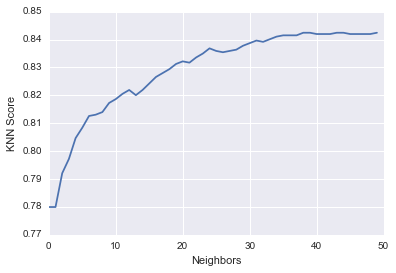

In [11]:
plt.plot(l)
plt.xlabel("Neighbors")
plt.ylabel("KNN Score")
plt.show()